<H1>DS 7331 Fall 2023: Lab 1</H1>
<H3>Team Members: Jae Chung, Matthew David, Nick Mueller, Alex Thibeaux</H3>
<br>
<H2>Kaggle Diabetes Dataset</H2>
<H4> Libraries Used: </H4>

In [1]:
# Libraries
import numpy as np
import pandas as pd
import opendatasets as od # Loading in Kaggle Datasets
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

<H4>Data Step</H4>

In [2]:

# Define the file path
file_path = r'C:\Users\matth\Machine Learning\Proj1\preclean.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
# Randomly sample 15,000 rows when diabetes_binary is "0"
data1_0 = df[df['Diabetes_binary'] == 0].sample(n=15000, random_state=42)

# Randomly sample 15,000 rows when diabetes_binary is "1"
data1_1 = df[df['Diabetes_binary'] == 1].sample(n=15000, random_state=42)

# Concatenate the two sampled DataFrames into data1
data1 = pd.concat([data1_0, data1_1])

# Reset the index of the new DataFrame
data1.reset_index(drop=True, inplace=True)

# Display the first few rows of data1
data1.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,5.0,0.0,0.0,4.0,6.0,7.0
1,0.0,1.0,1.0,1.0,25.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,4.0,5.0
2,0.0,1.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,3.0,2.0,0.0,0.0,2.0,6.0,8.0
3,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,3.0,5.0,1.0,1.0,13.0,6.0,1.0
4,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,13.0,5.0,6.0


<H3> Business Understanding </H3>

Diabetes is a chronic disease affecting nearly 37.3 million Americans, and a significant 38% of individuals over the age of 18 have prediabetes. To gain a deeper understanding of this disease, the Behavior Risk Factor Surveillance System (BRFSS) conducts annual surveys involving approximately 400,000 adults. 

In our study, we worked with a dataset comprising 253,680 complete responses (out of 441,455 original responses) collected during the 2015 survey. The initial dataset exhibited an imbalance, with 84% of the cases being nondiabetic. To address this imbalance and to focus our analytical efforts, we randomly sampled 15,000 non diabetic and 15,000 diabetic/ prediabetic and proceeded with the balanced 30,000 observations as our dataset. Additionally, the dataset was refined to include only 21 key features, prioritizing variables believed to have the most significant impact on predicting diabetes.

The primary goal of this dataset is to facilitate predictive modeling of diabetes based on health factors. This, in turn, aids public health officials in gaining deeper insights into diabetes and promoting early diagnosis, which can lead to lifestyle changes and more effective treatments. Diabetes not only leads to numerous health complications but also incurs a significant annual economic cost of nearly 727 billion dollars.

Our study aims to determine the most crucial features associated with diabetes and assess whether the reduced 21 features can support the development of a highly accurate predictive model. Such a model would enable public officials to implement more targeted diabetes screening methods. We will also be using classification algorithms to model for heart disease/ heart attack variable. Heart disease is one of the leading causes of death in America accounting for 17.4% of all deaths in 2021. To determine if we mined useful data we will compare some key statistics to the recent BRFSS conducted by the CDC 2022. To measure the effectiveness of our diabetes & heart disease classification algorithms, we will primarily use accuracy statistics, mainly Positive Predictive Value (PPV). We have chosen to prioritize PPV in our evaluation because it specifically measures the accuracy of positive predictions made by our model. In the context of diabetes screening, PPV is crucial as it quantifies the proportion of individuals predicted to have diabetes who indeed have the condition. This metric is particularly valuable when the consequences of false positive predictions are significant, such as in healthcare, where unnecessary medical interventions and patient anxiety must be minimized. 

<H3>Data Meaning Type</H3>
<I>Describe the meaning and type of data (scale, value,etc.) for each attribute in the data file.</I>

<table>
  <tr>
    <th>Variable</th>
    <th>Data Type</th>
    <th>Description</th>
    <th>Values</th>
  </tr>
  <tr>
    <td>Diabetes_binary</td>
    <td>Categorical - Ordinal</td>
    <td>Target variable that indicates the diabetes status of an individual</td>
    <td>0 = No diabetes/Only during pregnancy 1 = Prediabetes & Diabetes</td>
  </tr>
  <tr>
    <td>HighBP</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent has ever been told by a doctor that they have high blood pressure</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>HighChol</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent has ever been told by a doctor that they have high cholesterol</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>CholCheck</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent has had their cholesterol checked in the last 5 years</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>BMI</td>
    <td>Numerical - Continuous</td>
    <td>Represents the body mass index of the respondent</td>
    <td></td>
  </tr>
  <tr>
    <td>Smoker</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent has smoked at least 100 cigarettes in their lifetime</td>
    <td>0 = Non-Smoker 1 = Smoker</td>
  </tr>
  <tr>
    <td>Stroke</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent has had a stroke</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>HeartDiseaseorAttack</td>
    <td>Categorical - Binary</td>
    <td>Indicates the presence of coronary heart disease (CHD) or myocardial infarction (MI)</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>PhysActivity</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent has engaged in physical activity in the past 30 days (not including job)</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Fruits</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent consumes fruit 1 or more times per day</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Veggies</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent consumes vegetables 1 or more times per day</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>HvyAlcoholConsump</td>
    <td>Categorical - Binary</td>
    <td>Indicates if adult male has 14 or more drinks per week and if adult female has 7 or more drinks per week</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>AnyHealthcare</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent has any kind of health care coverage</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>NoDocbcCost</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent was not able to go to see a doctor in the past 12 months due to cost</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>GenHlth</td>
    <td>Categorical - Ordinal</td>
    <td>Indicates the status of the respondent's general health</td>
    <td>1 = Excellent 2 = Very Good 3 = Good 4 = Fair 5 = Poor</td>
  </tr>
  <tr>
    <td>MentHlth</td>
    <td>Numerical - Continuous</td>
    <td>Represents the number of days the respondent had poor mental health in the last 30 days</td>
    <td>1 - 30</td>
  </tr>
  <tr>
    <td>PhysHlth</td>
    <td>Numerical - Continuous</td>
    <td>Represents the number of days the respondent had poor physical health in the last 30 days</td>
    <td>1 - 30</td>
  </tr>
  <tr>
    <td>DiffWalk</td>
    <td>Categorical - Binary</td>
    <td>Indicates if the respondent had difficulty walking</td>
    <td>0 = No 1 = Yes</td>
  </tr>
  <tr>
    <td>Sex</td>
    <td>Categorical - Binary</td>
    <td>Indicates the sex of the respondent</td>
    <td>0 = Female 1 = Male</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>Categorical - Ordinal</td>
    <td>Indicates the respondent's age in 5 year increments</td>
    <td>1 = 18-24 ... 9 = 60-64 ... 13 = 80+</td>
  </tr>
  <tr>
    <td>Education</td>
    <td>Categorical - Ordinal</td>
    <td>Indicates the respondent's education level</td>
    <td>1 = Never attended ... 4 = 12th Grade or GED ... 6 = College 4 or more years</td>
  </tr>
  <tr>
    <td>Income</td>
    <td>Categorical - Ordinal</td>
    <td>Indicates the respondent's income level</td>
    <td>1 = less than 10,000 ... 5 = less than 35,000 ... 8 = 75,000 or more</td>
  </tr>
</table>

<H3> Data Quality </H3>
<I>Verify data quality: Explain any missing values, duplicate data, and outliers.Are those mistakes? How do you deal with these problems? Be specific.</I>

This data has already been cleaned by Kaggle user Alex Teboul. The original dataset with responses from 441,455 individuals and 330 features can be found here: https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system and the notebook Teboul used for the data cleaning can be found here: https://www.kaggle.com/code/alexteboul/diabetes-health-indicators-dataset-notebook/notebook. The 21 features that Teboul selected were influenced heavily by the features chosen for a research paper by Zidian Xie et al for "Building Risk Prediction Models for Type 2 Diabetes Using Machine Learning Techniques" using the 2014 BRFSS.

<H4> Data Balance </H4>
We randomly sampled 30,000 observations from the dataset, 15,000 being non-diabetic and 15,000 being prediabetic or diabetic. A good reason to balance the dataset was that respondants with no diabetes made up 84% of the original dataset, a prevalence high enough that it would affect our prediction metrics. Since the unbalanced data Teboul provided was still well over 200k respondants, balancing the data also provided the benefit of decreasing the amount of memory required to run our analysis.

<H4> Missing Data </H4>
Teboul removed over 100k rows from the original data because of missing values, but does not indicate whether the missing values were missing completely at random or not. Teboul also removed respondants who responded "don't know" or "refused to   responses, these outliers may not skew our results, but it will be something to keep in mind. Looking at output below we can  verify this as we see that none of the features appear to have any missing data.

In [4]:
# Check for missing values in the reduced dataset
missing_values = data1.isnull()

print(missing_values)

       Diabetes_binary  HighBP  HighChol  CholCheck    BMI  Smoker  Stroke  \
0                False   False     False      False  False   False   False   
1                False   False     False      False  False   False   False   
2                False   False     False      False  False   False   False   
3                False   False     False      False  False   False   False   
4                False   False     False      False  False   False   False   
...                ...     ...       ...        ...    ...     ...     ...   
29995            False   False     False      False  False   False   False   
29996            False   False     False      False  False   False   False   
29997            False   False     False      False  False   False   False   
29998            False   False     False      False  False   False   False   
29999            False   False     False      False  False   False   False   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHeal

<H4> Outliers </H4>
As can be seen in the figure below, the features Physical Health, Mental Health, and BMI have a number of outliers. This is true even after log-transforming each variable. Given that we have 30k responses, these outliers may not skew our results, but it will be something to keep in mind.

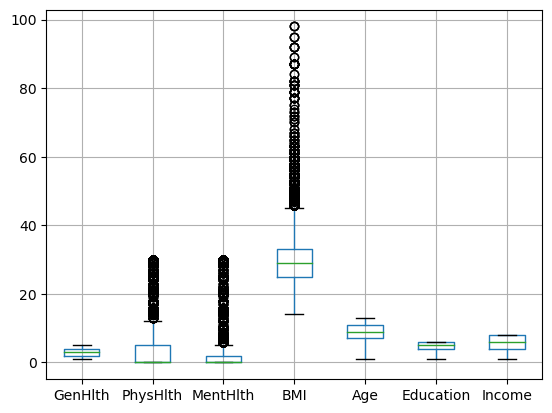

In [5]:
# Boxplots of Ordinal/Continuous Features
data1_sub = data1[['GenHlth','PhysHlth','MentHlth','BMI','Age','Education','Income']]
ax = data1_sub.boxplot()

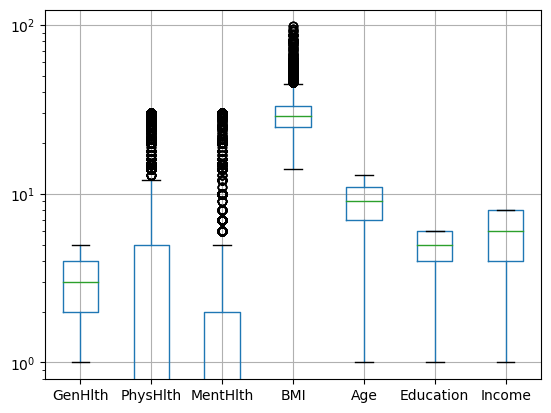

In [6]:
# Log transformed Box Plots
ax = data1_sub.boxplot()
ax.set_yscale('log')

<H3> Simple Statistics </H3>
<I>Give simple, appropriate statistics (range, mode, mean, median, variance,counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful.</I>

General Health, BMI, Age, Education, and Income all have means that are close to their medians (indicating normal distribution), whereas Physical Health and Mental Health have medians at 0 and non-zero means. Since the health indicators are self-reported and based primarily on the patient's own perception of their health, the skewness of these two variables may not impact our predictions, but it is still interesting.     

In [7]:
# Statistics on the 7 variables that are not binary
data1_sub.describe()

,GenHlth,PhysHlth,MentHlth,BMI,Age,Education,Income
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2.842067,5.824033,3.720533,29.879367,8.572700,4.922367,5.703133
std,1.112369,10.087024,8.117025,7.219069,2.850799,1.031718,2.169061
min,1.000000,0.000000,0.000000,14.000000,1.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,25.000000,7.000000,4.000000,4.000000
50%,3.000000,0.000000,0.000000,29.000000,9.000000,5.000000,6.000000
75%,4.000000,5.000000,2.000000,33.000000,11.000000,6.000000,8.000000
max,5.000000,30.000000,30.000000,98.000000,13.000000,6.000000,8.000000


<H3> Visualize Attributes </H3>

<I>Visualize the most important attributes appropriately (at least 5 attributes).important: Provide an interpretation for each chart. Explain for each attribute why the chosen visualization is appropriate.</I>

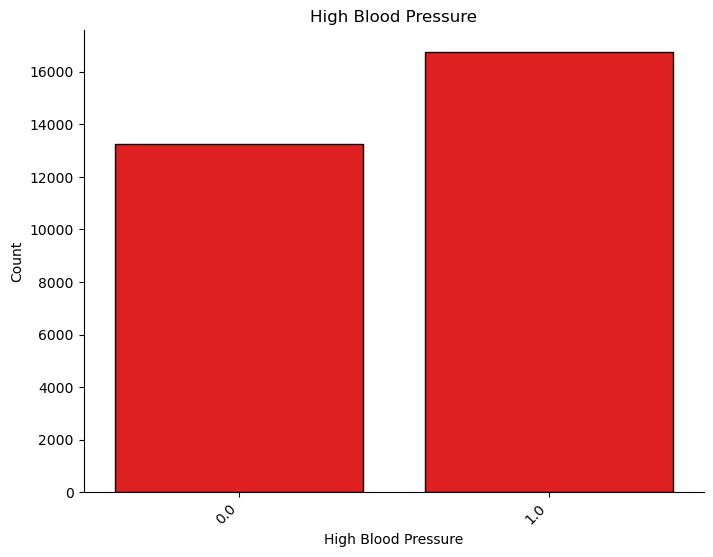

In [8]:
# High Blood Pressure
grouped_data = data1.groupby('HighBP').size().reset_index(name='counts')

# Plotting
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='HighBP', y='counts', data=grouped_data, color='red', edgecolor='black')
ax.set_title("High Blood Pressure")
ax.set_xlabel("High Blood Pressure")
ax.set_ylabel("Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()  # To give a similar appearance to theme_economist()

plt.show()

<H4> High Blood Pressure </H4>

The bar chart illustrates the count of individuals categorized by their blood pressure levels, with '0' representing non-high blood pressure and '1' indicating high blood pressure. Notably, this variable demonstrates a distribution that is relatively balanced, although there appears to be a slight skew, with approximately 3,000 more individuals falling into the 'high blood pressure' category.

This distribution is a key observation and underscores the importance of our analysis. The presence of a higher count of high blood pressure cases within our dataset is a significant finding. While the distribution may be slightly skewed, it highlights the gravity of the issue we are addressing. This visual also indicates that high blood preasure may be a key variable in predicting both heart disease/heart attack as well as diabeties.

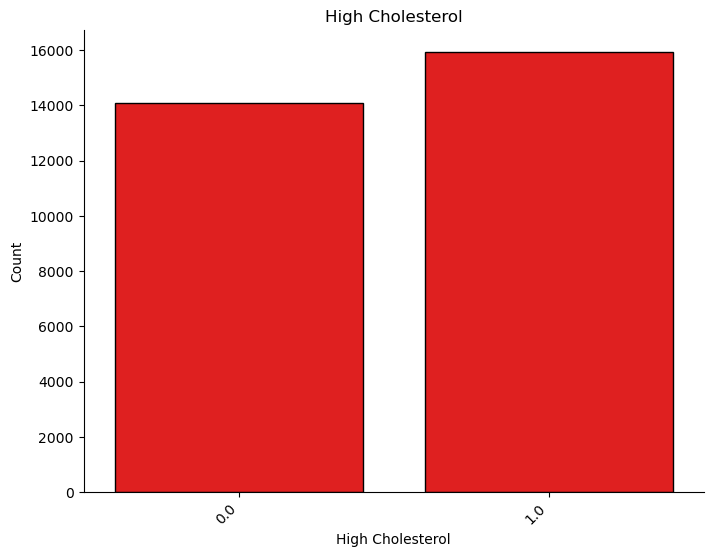

In [9]:
# High Cholesterol
grouped_data = data1.groupby('HighChol').size().reset_index(name='counts')

# Plotting
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='HighChol', y='counts', data=grouped_data, color='red', edgecolor='black')
ax.set_title("High Cholesterol")
ax.set_xlabel("High Cholesterol")
ax.set_ylabel("Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()  # Gives a similar appearance to theme_economist() in R

plt.show()

<H4> High Cholesterol </H4>

The bar chart presents the count of individuals categorized according to their cholesterol levels, where '0' corresponds to non-high cholesterol, and '1' indicates high cholesterol. Notably, this variable exhibits a balanced distribution, albeit with a slightly higher prevalence of the high cholesterol class.

However, it's paramount to underscore the significance of the higher prevalence of high cholesterol, especially in light of our previous observation regarding the higher prevalence of high blood pressure within the dataset. This finding underscores the gravity of the issue we are addressing. The coexistence of a relatively balanced cholesterol distribution and a higher prevalence of high blood pressure highlights the potential interplay between these two critical health factors.

This insight is important to our analysis because it suggests a possible connection between high cholesterol and high blood pressure within our dataset. It prompts us to explore further, raising questions and opportunities for investigating the relationship between these variables. Such exploration could provide valuable insights into essential aspects of cardiovascular health, as well as factors contributing to conditions like heart disease or heart attacks, which are among our target response variables.

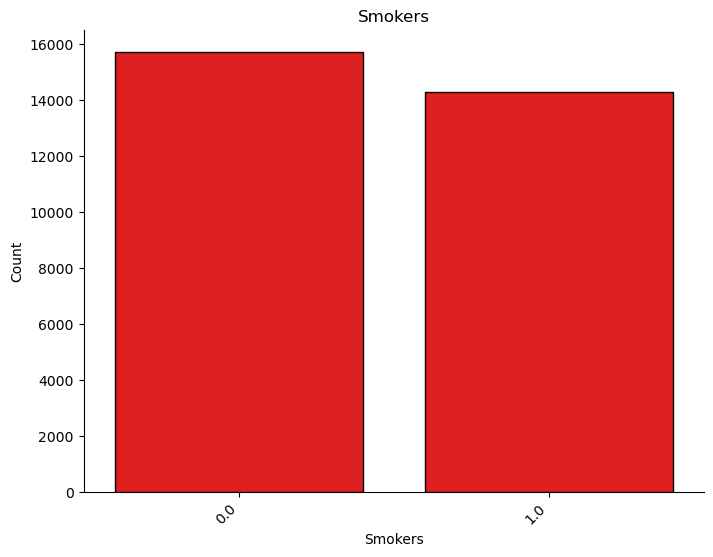

In [10]:
# Smoker & Non-Smoker
grouped_data = data1.groupby('Smoker').size().reset_index(name='counts')

# Plotting
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Smoker', y='counts', data=grouped_data, color='red', edgecolor='black')
ax.set_title("Smokers")
ax.set_xlabel("Smokers")
ax.set_ylabel("Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()  # Gives a similar appearance to theme_economist() in R

plt.show()

<H4> Smoker & Non-Smoker </H4>

The bar chart displays the count of individuals categorized as non-smokers('0.0') vs smokers(1.0). Notably, the distribution of the smoking variable appears to be relativly balanced, with a slightly higher prevalance of non-smokers compared to the smoker category. This balanced distribution is essential as it ensures that both classes are adequately represented in the dataset, minimizing the potential for class imbalance issues during predictive modeling.

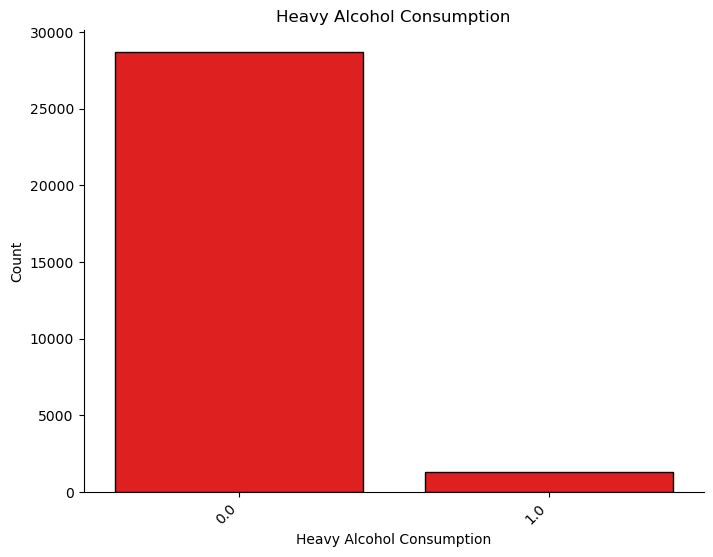

In [11]:
# Heavy Alcohol Consumption
grouped_data = data1.groupby('HvyAlcoholConsump').size().reset_index(name='counts')

# Plotting
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='HvyAlcoholConsump', y='counts', data=grouped_data, color='red', edgecolor='black')
ax.set_title("Heavy Alcohol Consumption")
ax.set_xlabel("Heavy Alcohol Consumption")
ax.set_ylabel("Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()  # Provides a similar appearance to theme_economist() in R

plt.show()

<H4> Heavy Alcohol Consumption </H4>

The bar chart illustrates the count of individuals categorized as having no heavy alcohol consumption (labeled '0.0') versus those with heavy alcohol consumption (labeled '1.0'). Strikingly, this variable exhibits a pronounced skew, with a significant majority falling into the 'no heavy alcohol consumption' category. This substantial imbalance demands meticulous attention during further analysis.

In our study, this class imbalance is particularly concerning due to its potential to introduce model bias. Such bias could result in the accurate prediction of the 'no heavy alcohol consumption' class (the majority) while leading to lower accuracy in predicting the 'Heavy alcohol consumption' class (the minority). To mitigate this issue, it is crucial to select evaluation metrics that are sensitive to this imbalance, such as Positive Predictive Value (PPV) or precision.

This visualization not only highlights the data's inherent imbalance but also guides our approach to model assessment. By emphasizing metrics that prioritize precision in predicting diabetes outcome for the 'Heavy alcohol consumption' class, we aim to ensure that our results are not misleading and provide an accurate assessment of our model's performance, especially in the context of this skewed distribution.

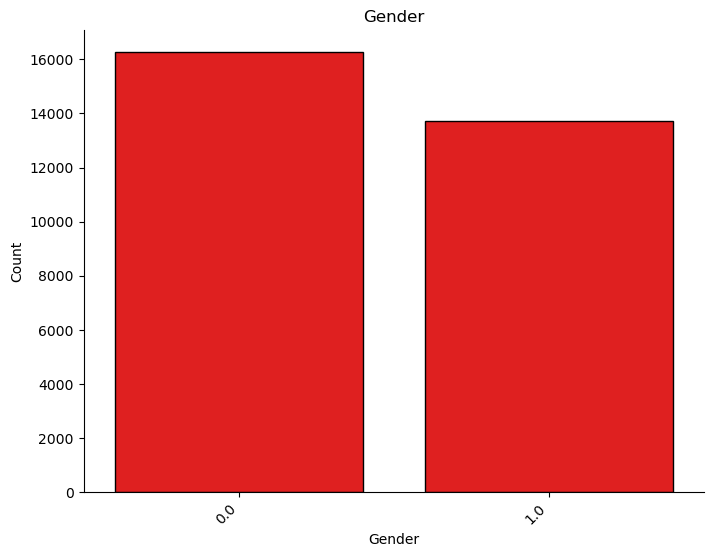

In [12]:
# Gender
grouped_data = data1.groupby('Sex').size().reset_index(name='counts')

# Plotting
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Sex', y='counts', data=grouped_data, color='red', edgecolor='black')
ax.set_title("Gender")
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()  # Provides a similar appearance to theme_economist() in R

plt.show()

<H4> Gender Attribute </H4>

The bar chart displays the count of individuals categorized by sex, with '0' representing females and '1' representing males. Notably, this variable exhibits a balanced distribution, with a relatively equal number of females and males in the dataset. This balanced representation between the two sexes is of paramount importance in our analysis.

Having a balanced distribution ensures that both female and male populations are adequately represented in our dataset. This balance is crucial because it enables our analysis and predictive modeling to consider the characteristics and potential factors influencing both sexes equally. It prevents any potential bias that might arise from an unequal representation, which could lead to skewed results or inaccurate conclusions.

<H3> Explore Joint Attributes </H3>

<I>Explore relationships between attributes: Look at the attributes via scatterplots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.</I>

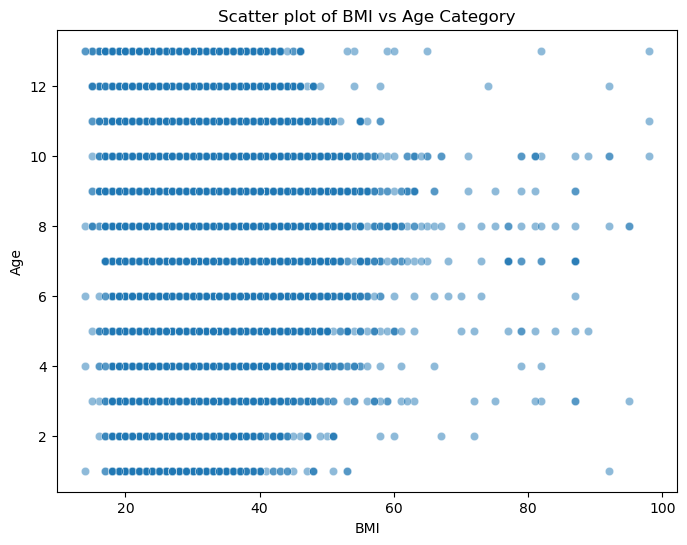

In [13]:
# Scatter Plot: BMI vs. Age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='Age', data=data1, alpha=0.5)
plt.title("Scatter plot of BMI vs Age Category")
plt.xlabel("BMI")
plt.ylabel("Age")
plt.show()

<H4> Scatter plot of BMI vs Age Category </H4>

Examining the distribution between BMI and Age categories, it's evident that middle-aged respondents tend to have a higher concentration of elevated BMI values compared to both the younger and older age groups. This suggests that BMI issues might peak during midlife in this particular dataset.

 

Furthermore, the presence of distinct data points with extremely high BMI values indicates outliers. It's noteworthy that the study includes individuals with such critical BMI levels, potentially reflecting severe obesity cases or other health concerns.

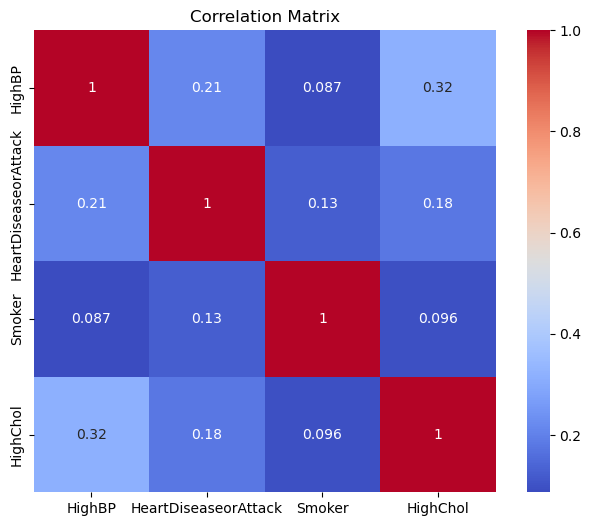

In [14]:
# Correlation Matrix
correlations = data1[["HighBP", "HeartDiseaseorAttack", "Smoker", "HighChol"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

<H4> Correlation Matrix </H4>
In the provided heatmap, we delved into the interrelationships among four key health metrics: High Cholesterol, High Blood Pressure, Smoker, and Heart Disease or Attack. This visualization facilitates a swift and intuitive understanding of how these health indicators are interconnected.

 

From the heatmap, it's clear that the most pronounced correlation exists between HighChol and HighBP, indicating a strong association between high cholesterol levels and high blood pressure. Conversely, the correlation between HighBP and Smoker appears to be the weakest, suggesting that in this dataset, high blood pressure and smoking status may not have as direct or linear a relationship compared to other variable pairings.

In [15]:
# Cross-tabulation
cross_tab = pd.crosstab(data1['Diabetes_binary'], data1['PhysActivity'])
print(cross_tab)

PhysActivity      0.0    1.0
Diabetes_binary             
0.0              3397  11603
1.0              5519   9481


<H4> Cross-tabulation </H4>

The cross-tabulation provides a breakdown of respondents based on their diabetes status in relation to their engagement in physical activity. For the non-diabetic respondents, 3397 individuals did not engage in physical activity whereas 11603 did engage in physical activity. For the diabetic respondents, 5519 individuals do not engage in physical activity whereas 9481 diabetic individuals are physically active. The general trend we can see here is that a higher proportion of diabetic individuals seem to abstain from physical activity compared to non-diabetic individuals. We can conclude that physical activity appears to be a prevalent behavior among respondents regardless of their diabetes status. However, the proportionate difference between those who are active and those who are not is noticeably distinct when comparing diabetic to non-diabetic individuals. This raises questions about whether the onset of diabetes may deter some from maintaining or adopting an active lifestyle, or if other underlying factors might be at play

In [16]:
# Group-wise Averages
grouped_avg = data1.groupby('Diabetes_binary').agg({'BMI': 'mean', 'Age': 'mean'}).reset_index()
grouped_avg.columns = ['Diabetes_binary', 'Avg_BMI', 'Avg_Age']
print(grouped_avg)

   Diabetes_binary    Avg_BMI  Avg_Age
0              0.0  27.828533   7.7588
1              1.0  31.930200   9.3866


The table above represents group-wise averages of BMI and Age, segmented by diabetes status. For non-diabetic individuals, the average BMI stands at approximately 27.83, which is within the "overweight" category based on standard BMI classifications. The average age category is approximately 7.76 (50-59 years old). For diabetic individuals, there was a notably higher average BMI of around 31.93, placing them in the "obese" category. This underscores the frequent association between higher BMIs and the prevalence of diabetes. The average age category is approximately 9.39 (60-69 years old). In conclusion, a distinct rise in BMI can be observed when transitioning from the non-diabetic to the diabetic category. This association between elevated BMI and diabetes is consistent with prevailing medical knowledge which identifies obesity as a significant risk factor for the onset of diabetes. Additionally, the average age being higher for the diabetic group may suggest that age can be correlated with the onset or diagnosis of diabetes

<H3> Explore Attributes and Class </H3>

<I>Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).</I>

In [17]:
# Convert binary responses to factors

columns_to_convert = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke','HeartDiseaseorAttack',
                      'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump','AnyHealthcare', 'NoDocbcCost', 
                      'GenHlth', 'MentHlth', 'PhysHlth','DiffWalk', 'Sex', 'Age', 'Education', 'Income']  
for column in columns_to_convert:
    data1[column] = data1[column].astype('category')
    
# data1.info()

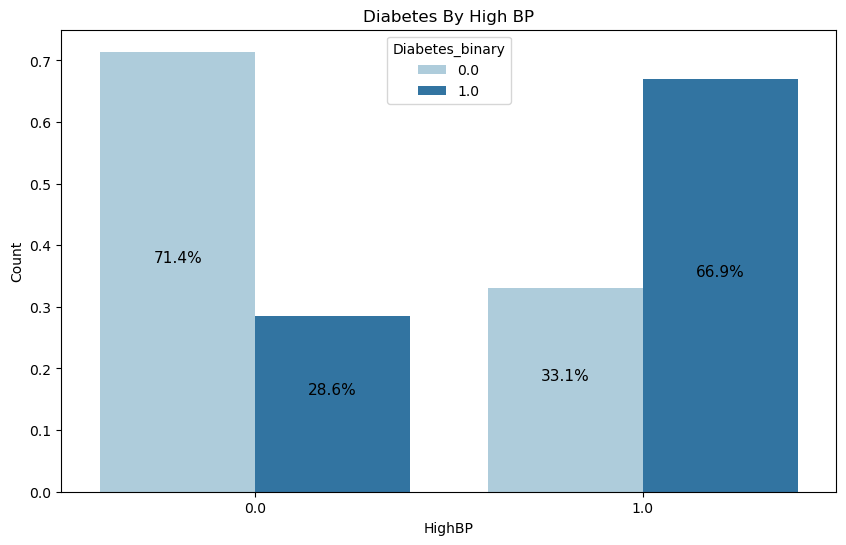

In [18]:
# Calculate the ratio of Diabetes values for each High Blood Pressure value
HighBPDiabetesPercent = data1.groupby('HighBP')['Diabetes_binary'].value_counts(normalize=True).reset_index(name='ratio')
HighBPDiabetesPercent['label'] = (HighBPDiabetesPercent['ratio'] * 100).round(1).astype(str) + '%'

# Plot
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='HighBP', y='ratio', hue='Diabetes_binary', data=HighBPDiabetesPercent, palette='Paired')
plt.title('Diabetes By High BP')
plt.ylabel('Count')

# Add text labels for percentages
for p in plot.patches:
    plot.annotate(f"{p.get_height() * 100:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                  ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0,10),
                  textcoords='offset points')

plt.show()

<H4> High BP vs Diabetes Variables Bar Chart </H4>
    
The first attribute investigated was High Blood pressure so that we can identify issues on a circulatory level. From the bar chart above we are able to visually see a difference between diabetic patients versus non diabetic patients with respect to High BP. Our bar chart shows that 66.8% of the diabetics in this data set have high blood pressure, compared to only 28.3% of non-diabetics.

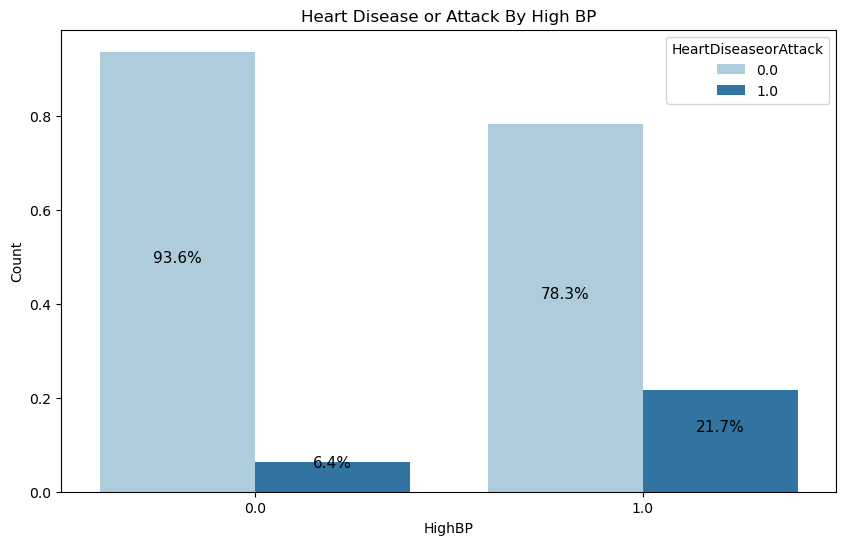

In [19]:
# Calculate the ratio of Heart Disease or Attack values for each High Blood Pressure value
HighBPHeartAttackPercent = data1.groupby('HighBP')['HeartDiseaseorAttack'].value_counts(normalize=True).reset_index(name='ratio')
HighBPHeartAttackPercent['label'] = (HighBPHeartAttackPercent['ratio'] * 100).round(1).astype(str) + '%'

# Visualization
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='HighBP', y='ratio', hue='HeartDiseaseorAttack', data=HighBPHeartAttackPercent, palette='Paired')
plt.title('Heart Disease or Attack By High BP')
plt.ylabel('Count')

# Adding text labels for percentages
for p in plot.patches:
    plot.annotate(f"{p.get_height() * 100:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                  ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0,10),
                  textcoords='offset points')

plt.show()

<H4> High BP vs Heart Attack Variables Bar Chart </H4>

In the graph above we are able to see high blood pressure with respect to heart disease or attack. We are able to see a drastic difference by almost 4 times in those who do not have high blood pressure and those who do with respect to having heart disease or attack.

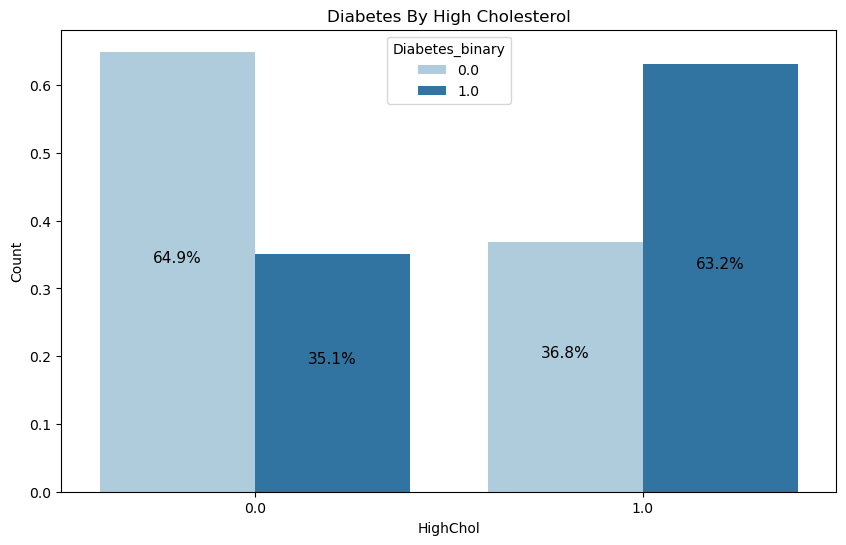

In [20]:
# Calculate the ratio of Diabetes values for each High Cholesterol value
HighCholDiabetesPercent = data1.groupby('HighChol')['Diabetes_binary'].value_counts(normalize=True).reset_index(name='ratio')
HighCholDiabetesPercent['label'] = (HighCholDiabetesPercent['ratio'] * 100).round(1).astype(str) + '%'

# Visualization
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='HighChol', y='ratio', hue='Diabetes_binary', data=HighCholDiabetesPercent, palette='Paired')
plt.title('Diabetes By High Cholesterol')
plt.ylabel('Count')

# Adding text labels for percentages
for p in plot.patches:
    plot.annotate(f"{p.get_height() * 100:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                  ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0,10),
                  textcoords='offset points')

plt.show()

<H4> High Cholesterol vs Diabetes Variables Bar Chart </H4>

In the graph above we are examining the effect diabetes has on high cholesterol. We are able to notice that 63.2% of diabetics in the data set have high cholesterol while only 36.8% did not develop high cholesterol. This is in stark contrast to non-diabetics, who have opposite statistics with only 35.1% having high cholesterol and 64.9% do not.

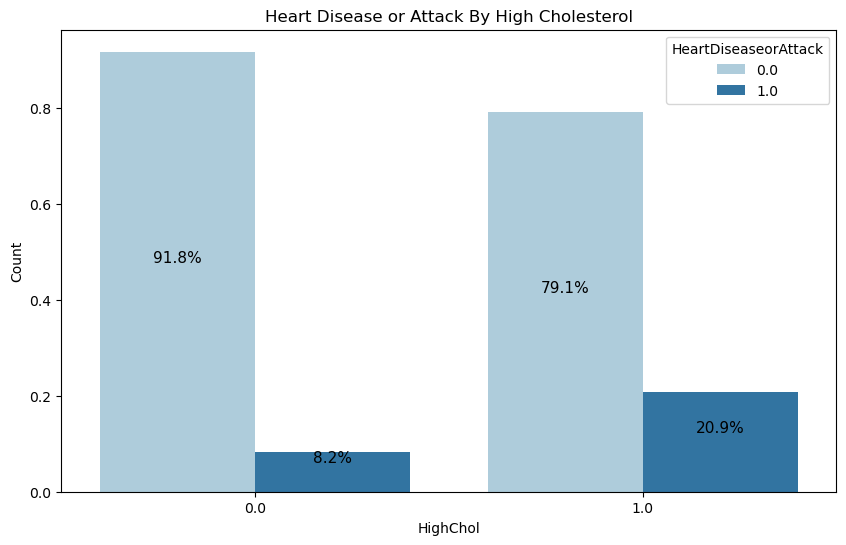

In [21]:
# Calculate the ratio of Heart Disease or Attack values for each High Cholesterol value
HighCholHeartAttackPercent = data1.groupby('HighChol')['HeartDiseaseorAttack'].value_counts(normalize=True).reset_index(name='ratio')
HighCholHeartAttackPercent['label'] = (HighCholHeartAttackPercent['ratio'] * 100).round(1).astype(str) + '%'

# Visualization
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='HighChol', y='ratio', hue='HeartDiseaseorAttack', data=HighCholHeartAttackPercent, palette='Paired')
plt.title('Heart Disease or Attack By High Cholesterol')
plt.ylabel('Count')

# Adding text labels for percentages
for p in plot.patches:
    plot.annotate(f"{p.get_height() * 100:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                  ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0,10),
                  textcoords='offset points')

plt.show()

<H4> High Cholesterol vs Heart Attack Variables Bar Chart </H4>

In the graph above we are able to see that 20.9% of people with high cholesterol do develop heart disease or a heart attack which is significantly different from the 8.2% that do have heart disease or heart attack but do not have high cholesterol. We are noticing over a 2 times difference.

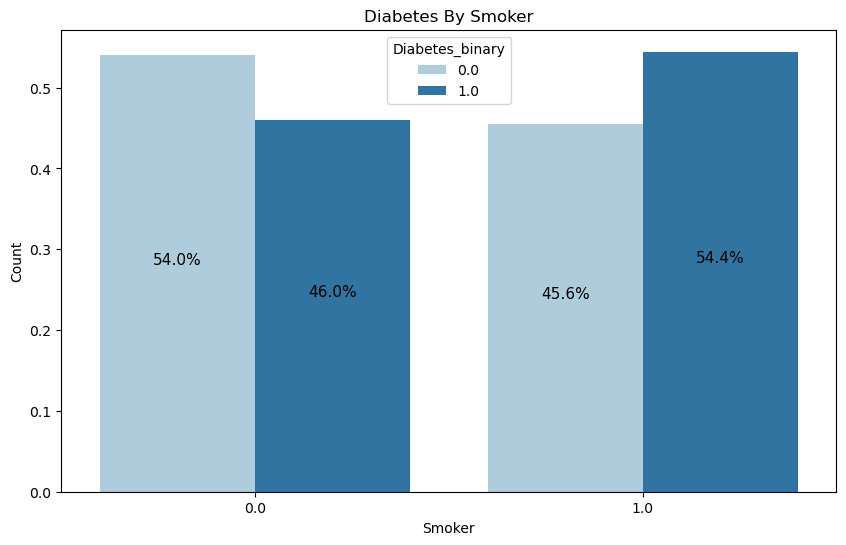

In [22]:
# Calculate the ratio of Diabetes values for each Non-Smoker/Smoker value
SmokerDiabetesPercent = data1.groupby('Smoker')['Diabetes_binary'].value_counts(normalize=True).reset_index(name='ratio')
SmokerDiabetesPercent['label'] = (SmokerDiabetesPercent['ratio'] * 100).round(1).astype(str) + '%'

# Visualization
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='Smoker', y='ratio', hue='Diabetes_binary', data=SmokerDiabetesPercent, palette='Paired')
plt.title('Diabetes By Smoker')
plt.ylabel('Count')

# Adding text labels for percentages
for p in plot.patches:
    plot.annotate(f"{p.get_height() * 100:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                  ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0,10),
                  textcoords='offset points')

plt.show()

<H4> Smokers vs Diabetes Variables Bar Chart </H4>

For the graph above we shifted our focus to controllable issues and sedimentary lifestyle choices. Here we are able to see smoking status and the percentage of diabetics vs. non-diabetics. We are able to see that 45.6% of diabetics do not smoke, while 54.4% of diabetics do smoke. Healthcare professionals suggest that smoking in some circumstance might cause type 2 diabetes, however with our visualization we are noticing almost a 50/50 split between diabetics that do smoke and diabetics that do not smoke. It is worth noting that in non-diabetics, the statistics are flipped in that 54% of non-diabetics do not smoke and 46% do.

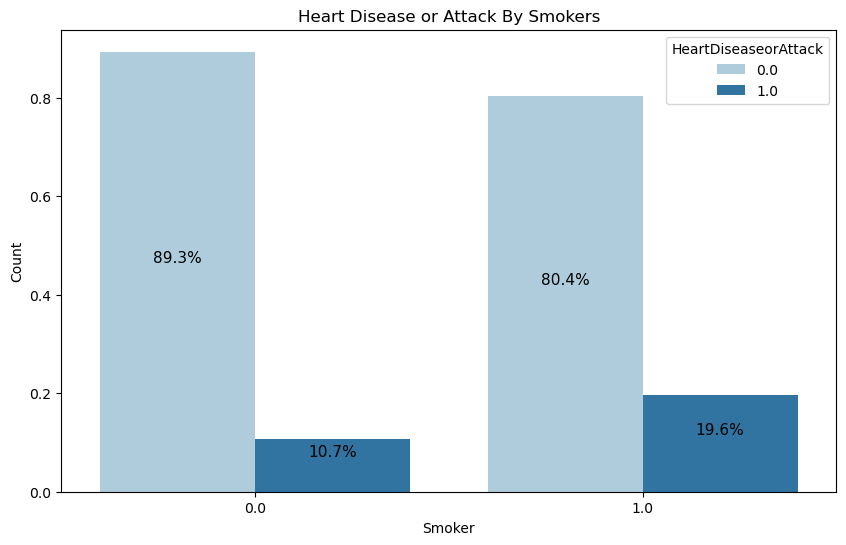

In [23]:
# Calculate the ratio of Heart Disease or Attack values for each Non-Smoker/Smoker value
SmokerHeartAttackPercent = data1.groupby('Smoker')['HeartDiseaseorAttack'].value_counts(normalize=True).reset_index(name='ratio')
SmokerHeartAttackPercent['label'] = (SmokerHeartAttackPercent['ratio'] * 100).round(1).astype(str) + '%'

# Visualization
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='Smoker', y='ratio', hue='HeartDiseaseorAttack', data=SmokerHeartAttackPercent, palette='Paired')
plt.title('Heart Disease or Attack By Smokers')
plt.ylabel('Count')

# Adding text labels for percentages
for p in plot.patches:
    plot.annotate(f"{p.get_height() * 100:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                  ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0,10),
                  textcoords='offset points')

plt.show()

<H4> Smokers vs Heart Attack Variables Bar Chart </H4>

Continuing with smoking and its effect on those who develop heart disease and/or an attack, we can see from the graph above the 10.7% of those who do not smoke develop heart disease, where 19.6% of smokers develop heart disease or attack.

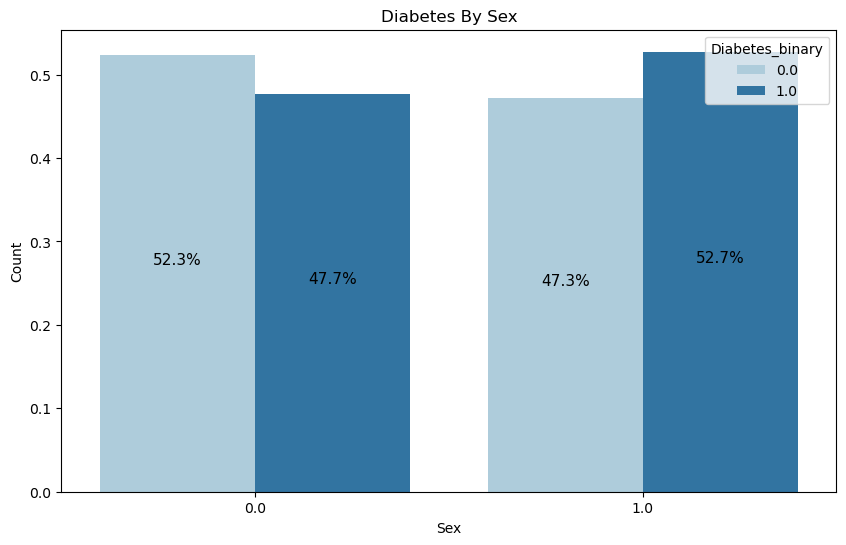

In [24]:
# Calculate the ratio of Diabetes values for each Gender
SexDiabetesPercent = data1.groupby('Sex')['Diabetes_binary'].value_counts(normalize=True).reset_index(name='ratio')
SexDiabetesPercent['label'] = (SexDiabetesPercent['ratio'] * 100).round(1).astype(str) + '%'

# Visualization
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='Sex', y='ratio', hue='Diabetes_binary', data=SexDiabetesPercent, palette='Paired')
plt.title('Diabetes By Sex')
plt.ylabel('Count')

# Adding text labels for percentages
for p in plot.patches:
    plot.annotate(f"{p.get_height() * 100:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                  ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0,10),
                  textcoords='offset points')

plt.show()

<H4> Sex vs Diabetes Variables Bar Chart </H4>

For this visualization we would like to look at an attribute that is uncontrollable. In the graph above we are able to see the difference between females(0) and males(1). There was not a drastic difference between females(0) or males(1), with 47.7% of diabetics in the data set females(0) and 52.7% males(1). Given that there were slightly more women in general in the dataset, it is interesting that there are more male diabetics than female diabetics.

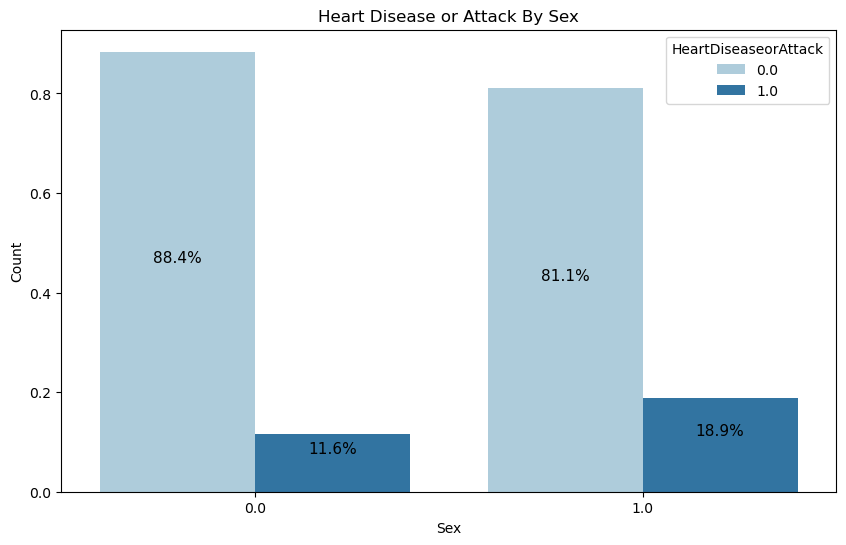

In [25]:
# Calculate the ratio of Heart Disease or Attack values for each Gender
SexHeartAttackPercent = data1.groupby('Sex')['HeartDiseaseorAttack'].value_counts(normalize=True).reset_index(name='ratio')
SexHeartAttackPercent['label'] = (SexHeartAttackPercent['ratio'] * 100).round(1).astype(str) + '%'

# Visualization
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='Sex', y='ratio', hue='HeartDiseaseorAttack', data=SexHeartAttackPercent, palette='Paired')
plt.title('Heart Disease or Attack By Sex')
plt.ylabel('Count')

# Adding text labels for percentages
for p in plot.patches:
    plot.annotate(f"{p.get_height() * 100:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                  ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0,10),
                  textcoords='offset points')

plt.show()

<H4> Sex vs Heart Attack Variables Bar Chart </H4>

The graph above shows the effect sex has on developing heart disease of attacks. Visually we are able to see the 11.6% of females(0) in this data set develop heart disease or attack, whereas 18.9% of males(1) develop heart disease or attack. This was a very interesting finding given the higher prevalence of females in the dataset as a whole.

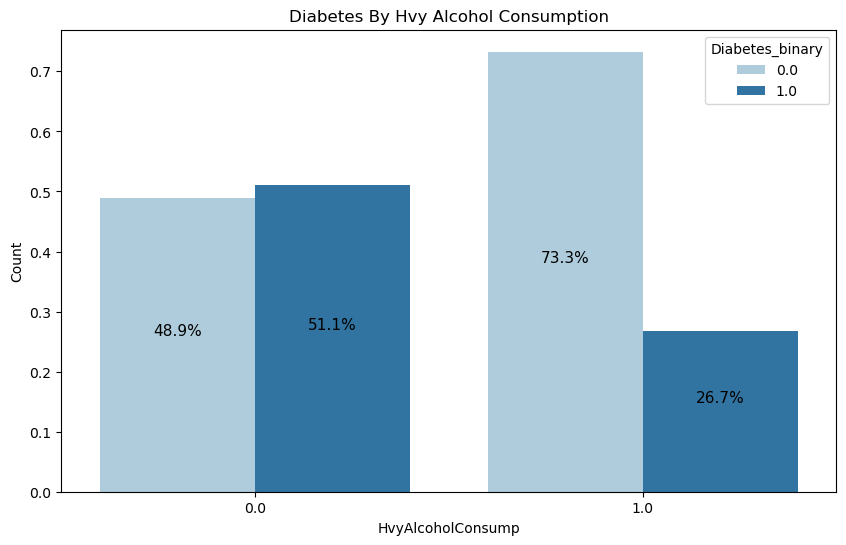

In [26]:
# Calculate the ratio of Diabetes values for each Heavy Alcohol Consumption value
HvyAlcoholConsumpDiabetesPercent = data1.groupby('HvyAlcoholConsump')['Diabetes_binary'].value_counts(normalize=True).reset_index(name='ratio')
HvyAlcoholConsumpDiabetesPercent['label'] = (HvyAlcoholConsumpDiabetesPercent['ratio'] * 100).round(1).astype(str) + '%'

# Visualization
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='HvyAlcoholConsump', y='ratio', hue='Diabetes_binary', data=HvyAlcoholConsumpDiabetesPercent, palette='Paired')
plt.title('Diabetes By Hvy Alcohol Consumption')
plt.ylabel('Count')

# Adding text labels for percentages
for p in plot.patches:
    plot.annotate(f"{p.get_height() * 100:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                  ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0,10),
                  textcoords='offset points')

plt.show()

<H4> Heavy Alcohol Consumption vs Diabetes Variables Bar Chart </H4>

For the graph above we shifted our focus to controllable issues and sedimentary lifestyle choices. We are able to see the percentage of those who drink heavily and those who do not drink heavily and its effect on diabetes. Our data was a little skewed with such a small sample size of heavy alcohol consumption, however, we will take note and proceed with caution. We are able to see 51.1% of people who do not drink heavily are diabetics, whereas 26.7% of people who drink heavily have diabetes. A few questions arise, alcohol is high in carbohydrates which is avoided by those who have diabetes. Those who currently have diabetes may not drink anymore, but for pre diabetes would the statistics show different results? Is the distribution different because majority of those who have diabetes can no longer drink due to carbohydrate intake and knowledge of the diabetic effect?

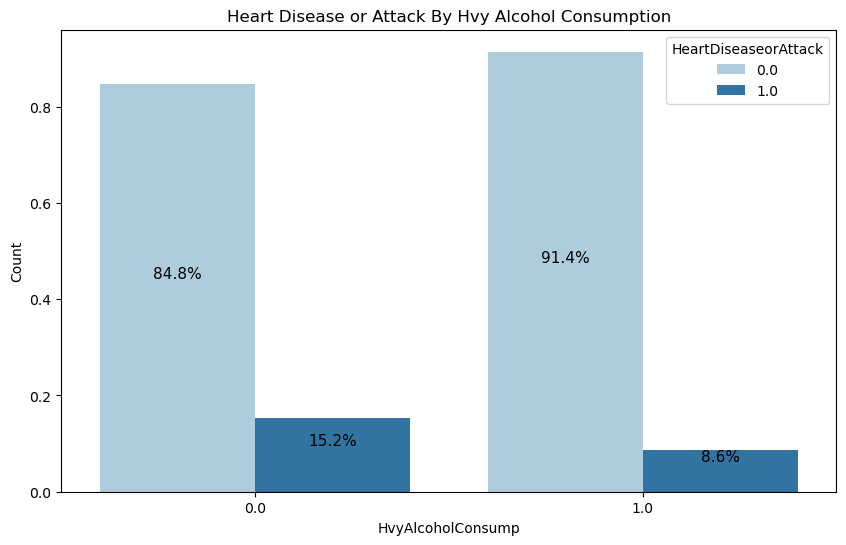

In [27]:
# Calculate the ratio of Heart Disease or Attack values for each Heavy Alcohol Consumption Value
HvyAlcoholConsumpHeartAttackPercent = data1.groupby('HvyAlcoholConsump')['HeartDiseaseorAttack'].value_counts(normalize=True).reset_index(name='ratio')
HvyAlcoholConsumpHeartAttackPercent['label'] = (HvyAlcoholConsumpHeartAttackPercent['ratio'] * 100).round(1).astype(str) + '%'

# Visualization
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='HvyAlcoholConsump', y='ratio', hue='HeartDiseaseorAttack', data=HvyAlcoholConsumpHeartAttackPercent, palette='Paired')
plt.title('Heart Disease or Attack By Hvy Alcohol Consumption')
plt.ylabel('Count')

# Adding text labels for percentages
for p in plot.patches:
    plot.annotate(f"{p.get_height() * 100:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                  ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0,10),
                  textcoords='offset points')

plt.show()

<H4> Heavy Alcohol Consumption vs Heart Attack Variables Bar Chart </H4>

With the graph above we are able to see heavy alcohol consumption and its effect on heart disease or attacks. We are able to see 15.2% of those who do not drink heavily develop heart conditions, whereas 8.6% of those who do drink heavily do develop a heart condition. This is surprising given general knowledge about the long-term effects of drinking, but we also have to consider the very small sample size we have of those who drink heavily.

<H3> New Features </H3>
<I> Are there other features that could be added to the data or created fromexisting features? Which ones?</I>

Additional features that could enhance our analysis include variables related to race, HbA1c levels, and waist-to-hip ratio, as recent studies suggest that BMI may not accurately reflect an individual's health status.

 

Regarding the existing variables, we have the opportunity to create a dietary feature by combining the fruit and vegetable consumption variables. This would allow us to explore the relationship between diet and diabetes. We propose creating three categories: 'Healthy Diet' (both fruit and vegetable consumption equals 1), 'Semi-Healthy Diet' (either fruit or vegetable consumption equals 1, but not both), and 'Unhealthy Diet' (neither fruit nor vegetable consumption equals 1). However, it's important to acknowledge some limitations of this new variable, such as the potential for high multicollinearity with the individual fruit and vegetable variables. Additionally, it may be somewhat misleading because it does not capture the quantity of consumption per day, only whether individuals consume these foods daily or not.

<H3> Exceptional Work </H3>
<I>You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.</I>

<H4>Dimensionality reduction via Undersampiling</H4>

We applied undersampling techniques to reduce Teboul's dataset, which initially comprised 253,680 instances, heavily skewed towards the non-diabetic class at 84%. Our goal was to create a more balanced dataset for more effective model training and feature selection. Through this process, we successfully downsized the dataset to 15,000 instances each for both the non-diabetic and prediabetic/diabetic classes. While this downsizing inevitably involved some information loss, it was a strategic choice made to save memory during model execution and feature selection processes. The reduction in dataset size will not significantly impact our overall analysis and modeling efforts, ensuring more efficient and balanced outcomes for our predictive tasks. We did compare our findings with the balanced dataset that Teboul provided and the differences were insignificant.

<H4> Dimension Reductionality via Principal Componet Analysis</H4>

In our analysis, we additionally attempted Principal Component Analysis (PCA) on the full dataset with the aim of reducing dimensionality while retaining critical information. However, the scree plot from PCA showed a decreasing trend rather than an upward one, indicating that additional principal components contributed less to explaining the variance. We contributed this to the binary nature of our categorical variables, since having an overwhelming amount of 0s and 1s does not leave much room for variance in the first place. Seeking an alternative approach for dimensionality reduction that aligns with categorical data, we turned to Multiple Correspondence Analysis (MCA). Unfortunately, MCA yielded similar results, with a descending scree plot. While investigating the cause of this trend is worth considering, for our study's objectives, we have decided to proceed with an undersampled dataset. This choice acknowledges that we will lose some information but ensures that our sample size remains substantial enough for robust analysis

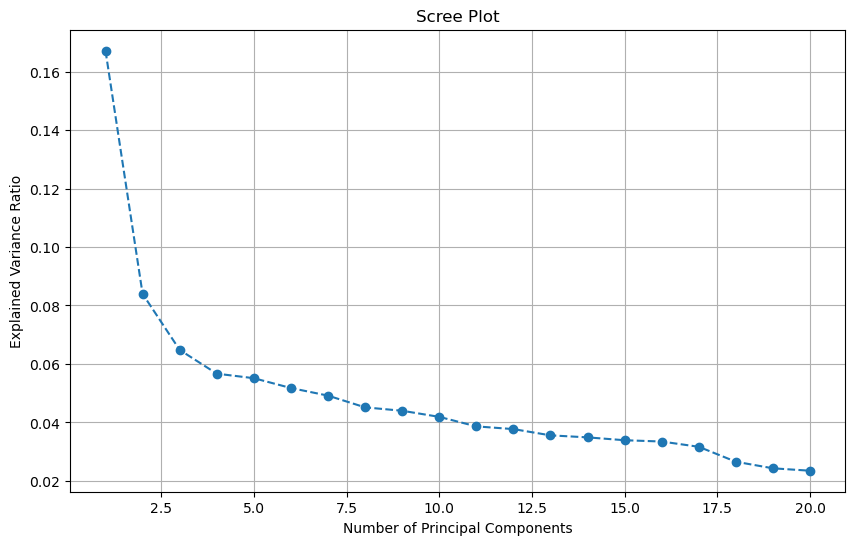

Number of components to keep: 17


In [30]:
# Chat GPT's code for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (if applicable)
# For PCA, you typically focus on features only
X = df.drop(columns=['Diabetes_binary'] if 'Diabetes_binary' in data1.columns else [])

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Instantiate PCA and specify the number of components you want
# If you don't specify n_components, it will use all available dimensions
n_components = 20  # Adjust this based on your needs
pca = PCA(n_components=n_components)

# Fit PCA on the standardized data
pca.fit(X_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a scree plot to visualize explained variance vs. number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

# Determine the number of components to keep based on the scree plot
# You can set a threshold or visually inspect the plot to decide
# For example, if you want to retain components that explain 90% of the variance
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
n_components_to_keep = np.argmax(cumulative_variance_ratio >= 0.90) + 1
print(f"Number of components to keep: {n_components_to_keep}")

# Now, you can use n_components_to_keep in your PCA analysis
pca = PCA(n_components=n_components_to_keep)
X_pca = pca.fit_transform(X_scaled)# MCA code from Chat GPT to examine



<H3>Multiple Correspondence Analysis (MCA) </H3>
<I>Text directly from Chat GPT's explanation of MCA:</I>

MCA is an unsupervised dimensionality reduction technique used for analyzing and visualizing the relationships between categorical variables in a dataset. It is a descriptive method that helps you explore the associations and patterns among categorical variables without the need for a target variable.

In MCA, you input a dataset containing only categorical variables, and it extracts dimensions (principal components) that capture the associations and dependencies between these variables. The result is a set of dimensions, each representing a combination of categorical variables that are related to each other in the dataset.

MCA is often used for exploratory data analysis and data visualization to understand the structure of categorical data, identify clusters or groups of related variables, and reveal patterns or trends. It is particularly useful when dealing with datasets that contain categorical variables and where traditional numerical techniques like PCA (Principal Component Analysis) are not applicable.

To perform MCA, you typically provide the categorical variables of interest and analyze their relationships directly, without the need for a target variable or any specific prediction task.

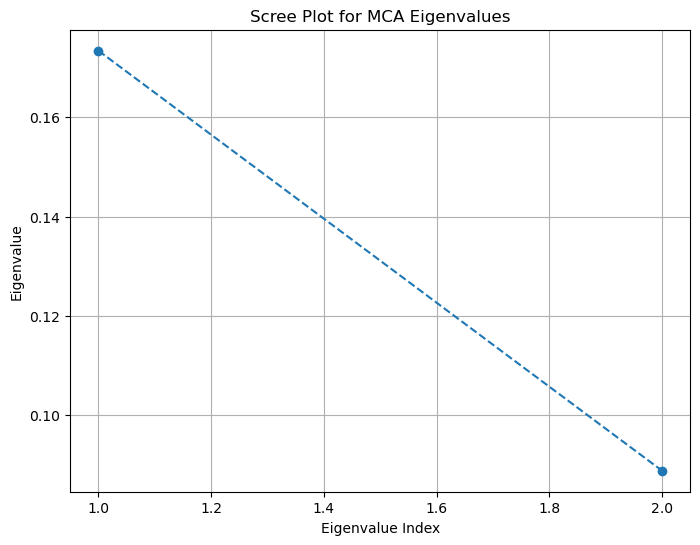

Explained Inertia for Each Dimension:
[0.66123183 0.33876817]


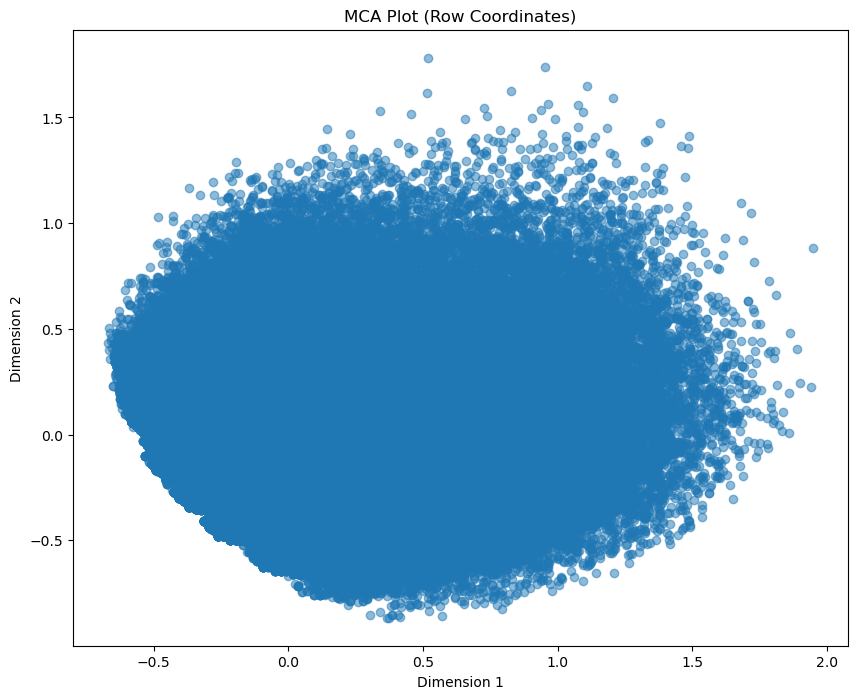

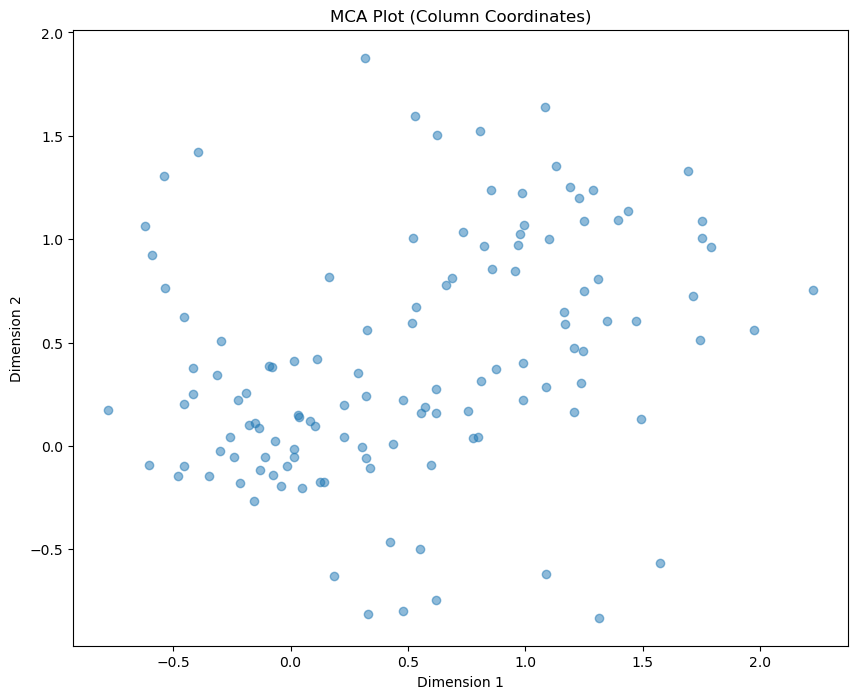

Total Explained Inertia for MCA: 1.0


AttributeError: 'MCA' object has no attribute 'column_correlations'

In [31]:
# MCA code from Chat GPT to examine

import prince

# Drop our only continuous variable
X = df.drop(columns=['BMI'] if 'BMI' in data1.columns else [])

# Initialize and fit the MCA model
mca = prince.MCA()
mca.fit(X)

# Calculate the eigenvalues
eigenvalues = mca.eigenvalues_

# Plot the eigenvalues scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.title("Scree Plot for MCA Eigenvalues")
plt.xlabel("Eigenvalue Index")
plt.ylabel("Eigenvalue")
plt.grid()
plt.show()

# Calculate the total inertia (sum of all eigenvalues)
total_inertia = eigenvalues.sum()

# Calculate the explained inertia for each dimension
explained_inertia = eigenvalues / total_inertia

# Print the explained inertia for each dimension
print("Explained Inertia for Each Dimension:")
print(explained_inertia)

# Access the row coordinates (individual observations) and column coordinates (categorical variable categories)
row_coordinates = mca.row_coordinates(X)
column_coordinates = mca.column_coordinates(X)

# Plot the row coordinates (individual observations) in a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(row_coordinates[0], row_coordinates[1], alpha=0.5)
plt.title("MCA Plot (Row Coordinates)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

# Plot the column coordinates (categorical variable categories) in a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(column_coordinates[0], column_coordinates[1], alpha=0.5)
plt.title("MCA Plot (Column Coordinates)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

# Print the total explained inertia
print("Total Explained Inertia for MCA:", explained_inertia.sum())

# Access the contributions of categories to dimensions
contributions = mca.column_correlations(data_categorial)
print("Contributions of Categories to Dimensions:")
print(contributions)

<H3>Comparing the Prevalence of Diabetes: Original Dataset vs. CDC National Diabetes Report for 2022</H3>

Our analysis, based on the 2015 BRFSS dataset, found a diabetes prevalence of approximately 13.93% (cross-tabulation below), notably higher than the 11.3% reported in a 2022 nationwide study. This divergence prompts further investigation into potential contributing factors. It's essential to acknowledge the possibility of a declining diabetes prevalence trend, although comprehensive research is required for firm conclusions. Additionally, our dataset combined prediabetes and diabetes, potentially accounting for the disparity when compared to the CDC's separate reporting. The CDC's revelation of 38% prediabetes among U.S. adults suggests underreported prediabetes cases, emphasizing the importance of refining our survey methodology. These insights underscore the need for ongoing research and survey adjustments to better grasp the evolving landscape of diabetes and prediabetes in our population.

<I>National Diabetes Statistics Report:</I> 
https://www.cdc.gov/diabetes/data/statistics-report/index.html

In [13]:
# Cross-tabulation
prev = df.groupby('Diabetes_binary').size().reset_index(name='cnt')
prev['perc'] = prev['cnt'] / prev['cnt'].sum()
prev['perc'] = prev['perc'].round(4)

# Print the result
print(prev)


   Diabetes_binary     cnt    perc
0              0.0  218334  0.8607
1              1.0   35346  0.1393
